In [1]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, merge, Input, concatenate, add
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D, GlobalAveragePooling2D
from keras.utils import np_utils
from keras.models import model_from_json
from keras import backend as K
from keras.preprocessing import image
from keras.optimizers import SGD, RMSprop
from keras.applications import InceptionV3, VGG16
from keras.utils.data_utils import get_file
import random
import os
from keras import regularizers
import cv2
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore", UserWarning)
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator
image_width = 75
image_height = 75

img_rows =  224
img_cols =  224
image_size = (image_width, image_height)

data_datagen = ImageDataGenerator(rescale=1.0/255,  validation_split=0.20, featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=True,  
        vertical_flip=False)

train_generator = data_datagen.flow_from_directory(
        '../input/simpsons-dataset/simpsons_dataset/simpsons_dataset/',  # this is the target directory
        target_size=image_size,  # all images will be resized to 224x224
        batch_size=16,
        class_mode='categorical',
         subset='training')

validation_generator = data_datagen.flow_from_directory(
        '../input/simpsons-dataset/simpsons_dataset/simpsons_dataset/',  # this is the target directory
        target_size=image_size,  # all images will be resized to 224x224
        batch_size=16,
        class_mode='categorical',
         subset='validation', shuffle = False)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
       '../input/dataset-simpsons-test/kaggle_simpson_testset/',  # this is the target directory
        target_size=image_size,  # all images will be resized to 224x224
        batch_size=16,
        class_mode='categorical',shuffle = False)

Found 11054 images belonging to 10 classes.
Found 2757 images belonging to 10 classes.
Found 456 images belonging to 10 classes.


In [3]:
def create_model():
    vgg16 = VGG16(include_top=False, input_shape=(75, 75, 3))
    
    model = Sequential()
    model.add(vgg16)
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)))
    model.add(Dense(10, activation='softmax'))   
    model.summary()
    #sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    rmsprop = RMSprop(lr=1e-3, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['acc'])
    return model
    
    

In [4]:
model = create_model()

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 2, 512)         2048      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 15,243,850
Trainable params: 15,242,826
Non-trainable params: 1

In [5]:
n_train = 11054
batch_size = 16
n_valid = 2757
history = model.fit_generator(
       train_generator,
       steps_per_epoch=n_train//batch_size,
       epochs=100,
       validation_data=validation_generator,
       validation_steps=n_valid//batch_size)

Epoch 1/100
690/690 [==============================] - 105s 152ms/step - loss: 3.5396 - acc: 0.2488 - val_loss: 3.6460 - val_acc: 0.1512
Epoch 2/100
690/690 [==============================] - 93s 134ms/step - loss: 2.1245 - acc: 0.4036 - val_loss: 2.4061 - val_acc: 0.3729
Epoch 3/100
690/690 [==============================] - 92s 133ms/step - loss: 1.8114 - acc: 0.5224 - val_loss: 2.4739 - val_acc: 0.3659
Epoch 4/100
690/690 [==============================] - 92s 133ms/step - loss: 1.5437 - acc: 0.6388 - val_loss: 1.6884 - val_acc: 0.5954
Epoch 5/100
690/690 [==============================] - 92s 133ms/step - loss: 1.4018 - acc: 0.6871 - val_loss: 3.6249 - val_acc: 0.5038
Epoch 6/100
690/690 [==============================] - 92s 133ms/step - loss: 1.2812 - acc: 0.7228 - val_loss: 1.3522 - val_acc: 0.6965
Epoch 7/100
690/690 [==============================] - 92s 133ms/step - loss: 1.1803 - acc: 0.7500 - val_loss: 1.4939 - val_acc: 0.7041
Epoch 8/100
690/690 [==========================

Epoch 61/100
690/690 [==============================] - 97s 141ms/step - loss: 0.4928 - acc: 0.9513 - val_loss: 2.6105 - val_acc: 0.1638
Epoch 62/100
690/690 [==============================] - 97s 141ms/step - loss: 0.4945 - acc: 0.9526 - val_loss: 2.6130 - val_acc: 0.1638
Epoch 63/100
690/690 [==============================] - 98s 142ms/step - loss: 0.4887 - acc: 0.9545 - val_loss: 2.6194 - val_acc: 0.1638
Epoch 64/100
690/690 [==============================] - 97s 141ms/step - loss: 0.4911 - acc: 0.9524 - val_loss: 2.6244 - val_acc: 0.1638
Epoch 65/100
690/690 [==============================] - 97s 141ms/step - loss: 0.4915 - acc: 0.9496 - val_loss: 2.6206 - val_acc: 0.1638
Epoch 66/100
690/690 [==============================] - 98s 141ms/step - loss: 0.5017 - acc: 0.9536 - val_loss: 2.6257 - val_acc: 0.1638
Epoch 67/100
690/690 [==============================] - 97s 141ms/step - loss: 0.5111 - acc: 0.9484 - val_loss: 2.6286 - val_acc: 0.1638
Epoch 68/100
690/690 [===================

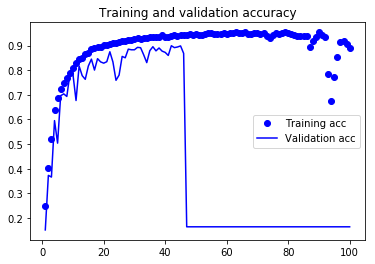

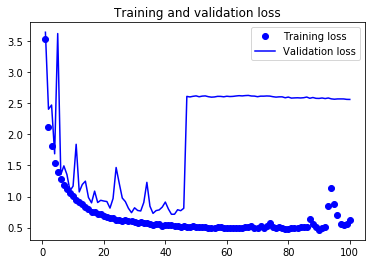

In [6]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best');

In [7]:
n_test = 456
Y_pred = model.predict_generator(test_generator, n_test//16+1)
y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred)



In [8]:
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)

Confusion Matrix


In [9]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe Real')
    plt.xlabel('Classe Predita')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]]


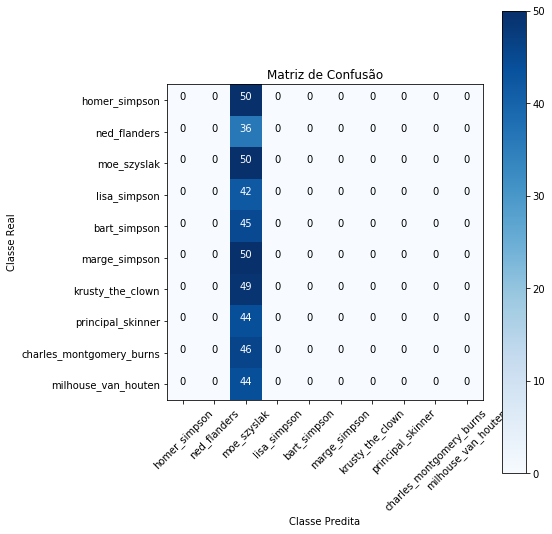

In [10]:
nomes_classes=['homer_simpson', 'ned_flanders', 'moe_szyslak', 'lisa_simpson','bart_simpson',
         'marge_simpson', 'krusty_the_clown', 'principal_skinner', 'charles_montgomery_burns', 'milhouse_van_houten']
plot_confusion_matrix(cm, classes=nomes_classes,
                      title='Matriz de Confusão')

In [11]:

target_names=['homer_simpson', 'ned_flanders', 'moe_szyslak', 'lisa_simpson', 
                 'bart_simpson', 'marge_simpson', 'krusty_the_clown', 
                 'principal_skinner', 'charles_montgomery_burns', 'milhouse_van_houten']
print (classification_report (test_generator.classes, y_pred, target_names = target_names))

                          precision    recall  f1-score   support

           homer_simpson       0.00      0.00      0.00        50
            ned_flanders       0.00      0.00      0.00        36
             moe_szyslak       0.11      1.00      0.20        50
            lisa_simpson       0.00      0.00      0.00        42
            bart_simpson       0.00      0.00      0.00        45
           marge_simpson       0.00      0.00      0.00        50
        krusty_the_clown       0.00      0.00      0.00        49
       principal_skinner       0.00      0.00      0.00        44
charles_montgomery_burns       0.00      0.00      0.00        46
     milhouse_van_houten       0.00      0.00      0.00        44

             avg / total       0.01      0.11      0.02       456

